In [79]:
from sklearn.feature_extraction.text import *
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np #

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn

from sklearn.svm import LinearSVC, SVC
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.utils import shuffle #
from sklearn.model_selection import train_test_split

In [6]:
# from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split

# data_train = shuffle(df)

# train, test = train_test_split(data_train, test_size=0.2)
# train_ = train.reset_index(drop=True)
# test_ = test.reset_index(drop=True)

In [379]:
mapper = {
 'дата прекращения существования (P576)':'dissolved (P576)',
 'создатель (P170)':'creator (P170)',
 'момент времени (P585)':'point in time (P585)',
 'архитектурный стиль (P149)':'architectural style (P149)',
 'дата окончания (P582)':'end time (P582)',
 'автор (P50)':'author (P50)',
 'дата рождения (P569)':'date of birth (P569)',
 'участник организации или клуба (P463)':'member of (P463)',
 'война/сражение (P607)':'conflict (P607)',
 'дата смерти (P570)':'date of death (P570)',
 'первое письменное упоминание (P1249)':'time of earliest written record (P1249)',
 'часть от (P361)':'part of (P361)',
 'дата начала (P580)':'start time (P580)',
 'дата публикации (P577)':'publication date (P577)',
 'род занятий (P106)':'occupation (P106)',
 'дата основания/создания/возникновения (P571)':'inception (P571)',
 'режиссёр (P57)':'director (P57)',
 'архитектор (P84)':'architect (P84)'
}

In [407]:
import json

test_ = json.load(open("OPEN_test_1810_shortened_final.json", "r", encoding="utf-8")) # OPEN_test_1810_shortened_final1 111111
# jsontest = json.load(open("OPEN_test_1810_shortened_final_for_eval.json", "r", encoding="utf-8"))

train = pd.read_csv('OPEN_train7443.tsv',sep="\t")

# make list of dicts from pandas df
train = train.to_dict('index')
train_ = [train[i] for i in train]

def engg(d):
    for di in d:
        di['eng'] = mapper[di['rel_r']]

engg(test_)

train_ = pd.DataFrame(train_)
test_ = pd.DataFrame(test_)

train = pd.DataFrame(train_, columns=['type', 'open_q', 'rel', 'rel_r'])
# df_train = df_train.sample(frac=1).reset_index(drop=True)
train.head()

test =  pd.DataFrame(test_, columns=['type', 'open_q', 'rel', 'rel_r'])
test.head()
# len(test)

In [387]:
# whole_d = jsontest + train

# for di in whole_d:
#     di['eng'] = mapper[di['rel_r']]
# #     print(di['eng'])

# whole_df = pd.DataFrame(whole_d)

In [383]:
whole_df.eng.value_counts() * 100 / whole_df.shape[0]

occupation (P106)                          35.583685
date of birth (P569)                       19.192903
conflict (P607)                            14.140431
point in time (P585)                        7.475928
part of (P361)                              7.346100
inception (P571)                            4.468246
member of (P463)                            4.305961
start time (P580)                           3.029319
dissolved (P576)                            2.207076
publication date (P577)                     1.027805
architectural style (P149)                  0.421941
creator (P170)                              0.421941
date of death (P570)                        0.097371
director (P57)                              0.086552
architect (P84)                             0.064914
time of earliest written record (P1249)     0.054095
end time (P582)                             0.043276
author (P50)                                0.032457
Name: eng, dtype: float64

In [388]:
whole_df.type.value_counts() * 100 / whole_df.shape[0]

P106       35.583685
start      34.242129
P607       14.140431
P361        7.346100
P463        4.305961
end         2.326085
P577        1.027805
creator     0.605864
P149        0.421941
Name: type, dtype: float64

In [390]:
whole_dfS = whole_df.groupby('eng', as_index=False).count().sort_values(by=['open_q'], ascending=False)
# df.sort_values(by=['col1'])
whole_dfS

,eng,Q,answer_dp,answer_open,atr,ent,open_q,rel,rel_r,type,type_pred,what
12,occupation (P106),3289,3289,3289,3289,3289,3289,3289,3289,3289,665,3289
5,date of birth (P569),1774,1774,1774,1774,1774,1774,1774,1774,1774,334,1774
3,conflict (P607),1307,1307,1307,1307,1307,1307,1307,1307,1307,258,1307
14,point in time (P585),691,691,691,691,691,691,691,691,691,143,691
13,part of (P361),679,679,679,679,679,679,679,679,679,110,679
10,inception (P571),413,413,413,413,413,413,413,413,413,83,413
11,member of (P463),398,398,398,398,398,398,398,398,398,66,398
16,start time (P580),280,280,280,280,280,280,280,280,280,54,280
8,dissolved (P576),204,204,204,204,204,204,204,204,204,40,204
15,publication date (P577),95,95,95,95,95,95,95,95,95,24,95


In [17]:
train_.head()

,Q,answer_dp,answer_open,atr,ent,open_q,rel,rel_r,type,what
0,Q729846,['барокко'],Французская академия,Q161806,"Вуатюр, Венсан",Членом какой организации был Венсан Вуатюр?,P463,участник организации или клуба (P463),P463,человек
1,Q4236746,['15 января 1915 года'],1919,date,"Кочетов, Александр Васильевич",Александр Васильевич Кочетов — год рождения?,P569,дата рождения (P569),start,человек
2,Q4221780,['Указом Президиума Верховного Совета СССР'],генетик,Q3126128,"Кирпичников, Валентин Сергеевич",Кем по профессии был Валентин Сергеевич Кирпич...,P106,род занятий (P106),P106,человек
3,Q51094830,['Гражданской'],монгольское нашествие на Русь,Q1134220,Битва на реке Воронеж,Частью какой войны была Битва на реке Воронеж?,P361,часть от (P361),P361,конфликт
4,Q4264961,['10 марта 1873 года'],1870,date,"Ловягин, Александр Михайлович",В каком году родился Александр Михайлович Ловя...,P569,дата рождения (P569),start,человек


In [408]:
train = pd.DataFrame(train_, columns=['type', 'open_q', 'rel', 'rel_r'])
# df_train = df_train.sample(frac=1).reset_index(drop=True)
train.head()


,type,open_q,rel,rel_r
0,P463,Членом какой организации был Венсан Вуатюр?,P463,участник организации или клуба (P463)
1,start,Александр Васильевич Кочетов — год рождения?,P569,дата рождения (P569)
2,P106,Кем по профессии был Валентин Сергеевич Кирпич...,P106,род занятий (P106)
3,P361,Частью какой войны была Битва на реке Воронеж?,P361,часть от (P361)
4,start,В каком году родился Александр Михайлович Ловя...,P569,дата рождения (P569)


In [409]:
test =  pd.DataFrame(test_, columns=['type', 'open_q', 'rel', 'rel_r'])
test.head()
# len(test)

,type,open_q,rel,rel_r
0,start,В каком году родился Аркадий Яковлевич Сахнин?,P569,дата рождения (P569)
1,P106,Кем по профессии был Фёдор Георгиевич Логинов?,P106,род занятий (P106)
2,P607,В каком вооружённом конфликте участвовал Яков ...,P607,война/сражение (P607)
3,P106,Кем по профессии была Анна Александровна Любли...,P106,род занятий (P106)
4,P607,В какой войне участвовал Симон Давидович Кремер?,P607,война/сражение (P607)


In [20]:
trainS = train.groupby('type', as_index=False).count().sort_values(by=['open_q'], ascending=False)
# df.sort_values(by=['col1'])

In [364]:
trainS

,type,open_q,rel,rel_r
0,P106,2624,2624,2624
8,start,2550,2550,2550
5,P607,1049,1049,1049
2,P361,569,569,569
3,P463,332,332,332
7,end,171,171,171
4,P577,71,71,71
6,creator,46,46,46
1,P149,31,31,31


In [152]:
train.type.value_counts() * 100 / train.shape[0]

P106       35.254602
start      34.260379
P607       14.093779
P361        7.644767
P463        4.460567
end         2.297461
P577        0.953916
creator     0.618030
P149        0.416499
Name: type, dtype: float64

In [22]:
trainSR = train.groupby('rel', as_index=False).count().sort_values(by=['open_q'], ascending=False)
# df.sort_values(by=['col1'])

In [153]:
trainSR

,rel,type,open_q,rel_r
0,P106,2624,2624,2624
7,P569,1440,1440,1440
16,P607,1049,1049,1049
4,P361,569,569,569
15,P585,548,548,548
5,P463,332,332,332
10,P571,330,330,330
13,P580,226,226,226
11,P576,164,164,164
12,P577,71,71,71


In [24]:
trainSRR = train.groupby('rel_r', as_index=False).count().sort_values(by=['open_q'], ascending=False)
# df.sort_values(by=['col1'])

In [492]:
len(test)

1800

In [154]:
train.rel_r.value_counts() * 100 / train.shape[0]

род занятий (P106)                              35.254602
дата рождения (P569)                            19.347037
война/сражение (P607)                           14.093779
часть от (P361)                                  7.644767
момент времени (P585)                            7.362623
участник организации или клуба (P463)            4.460567
дата основания/создания/возникновения (P571)     4.433696
дата начала (P580)                               3.036410
дата прекращения существования (P576)            2.203413
дата публикации (P577)                           0.953916
создатель (P170)                                 0.429934
архитектурный стиль (P149)                       0.416499
режиссёр (P57)                                   0.080613
архитектор (P84)                                 0.080613
дата смерти (P570)                               0.080613
первое письменное упоминание (P1249)             0.053742
дата окончания (P582)                            0.040306
автор (P50)   

In [147]:
testS = test.groupby('type', as_index=False).count().sort_values(by=['open_q'], ascending=False)
# df.sort_values(by=['col1'])

In [148]:
testS

,type,open_q,rel,rel_r
0,P106,665,665,665
8,start,615,615,615
5,P607,258,258,258
2,P361,110,110,110
3,P463,66,66,66
7,end,44,44,44
4,P577,24,24,24
6,creator,10,10,10
1,P149,8,8,8


In [391]:
test.type.value_counts() * 100 / test.shape[0]

P106       36.944444
start      34.166667
P607       14.333333
P361        6.111111
P463        3.666667
end         2.444444
P577        1.333333
creator     0.555556
P149        0.444444
Name: type, dtype: float64

In [28]:
# testSR = test.groupby('rel', as_index=False).count().sort_values(by=['open_q'], ascending=False)
# # df.sort_values(by=['col1'])

In [36]:
# testSR

In [144]:
# names rel_r
testSRR = test.groupby('rel_r', as_index=False).count().sort_values(by=['open_q'], ascending=False)
# df.sort_values(by=['col1'])

In [145]:
testSRR

,rel_r,type,open_q,rel
13,род занятий (P106),665,665,665
8,дата рождения (P569),334,334,334
2,война/сражение (P607),258,258,258
10,момент времени (P585),143,143,143
16,часть от (P361),110,110,110
5,дата основания/создания/возникновения (P571),83,83,83
15,участник организации или клуба (P463),66,66,66
3,дата начала (P580),54,54,54
6,дата прекращения существования (P576),40,40,40
7,дата публикации (P577),24,24,24


In [141]:
test.rel_r.value_counts() * 100 / test.shape[0]

род занятий (P106)                              36.944444
дата рождения (P569)                            18.555556
война/сражение (P607)                           14.333333
момент времени (P585)                            7.944444
часть от (P361)                                  6.111111
дата основания/создания/возникновения (P571)     4.611111
участник организации или клуба (P463)            3.666667
дата начала (P580)                               3.000000
дата прекращения существования (P576)            2.222222
дата публикации (P577)                           1.333333
архитектурный стиль (P149)                       0.444444
создатель (P170)                                 0.388889
дата смерти (P570)                               0.166667
режиссёр (P57)                                   0.111111
дата окончания (P582)                            0.055556
первое письменное упоминание (P1249)             0.055556
автор (P50)                                      0.055556
Name: rel_r, d

In [ ]:
# момент времени (P585) 0.3490566037735849
# война/сражение (P607) 0.205607476635514
# дата рождения (P569) 0.3522267206477733
# род занятий (P106) 0.11952861952861953
# дата прекращения существования (P576) 0.08108108108108109
# дата основания/создания/возникновения (P571) 0.25757575757575757
# участник организации или клуба (P463) 0.17857142857142858
# часть от (P361) 0.2222222222222222
# дата начала (P580) 0.17391304347826086
# создатель (P170) 0.75
# дата публикации (P577) 0.2631578947368421
# архитектурный стиль (P149) 0.14285714285714285
# division by zero дата окончания (P582) 1

# MultinomialNB

In [410]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [411]:
from nltk.corpus import stopwords

mystoplemmas = ['который','прошлый','сей', 'свой', 'наш', 'мочь', 'такой', 'год', 'время', 'день', 'весь']
mystopwords = stopwords.words('russian') + mystoplemmas + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д', 'г']
   

In [412]:
count_vect = CountVectorizer(ngram_range = [3,3], analyzer = 'word',  min_df = 2, stop_words=mystopwords)
X_train = count_vect.fit_transform(train.open_q)
y_train = train['rel'].values

X_test = count_vect.transform(test.open_q)
y_test = test['rel'].values


In [413]:
classifier = MultinomialNB(alpha=0.01)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [421]:
y_predict = classifier.predict(X_test)

In [422]:
print('Accuracy score:', accuracy_score(y_test, y_predict))
print('F1-measure (micro):', f1_score(y_test, y_predict, average='micro'))
print('F1-measure (macro):', f1_score(y_test, y_predict, average='macro'))

Accuracy score: 0.7927777777777778
F1-measure (micro): 0.7927777777777778
F1-measure (macro): 0.5620032177297979


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [423]:
y_predict

array(['P569', 'P106', 'P607', ..., 'P106', 'P106', 'P106'], dtype='<U5')

In [438]:
cat_mapper = {cat: n for n, cat in enumerate(test_.eng.unique())}

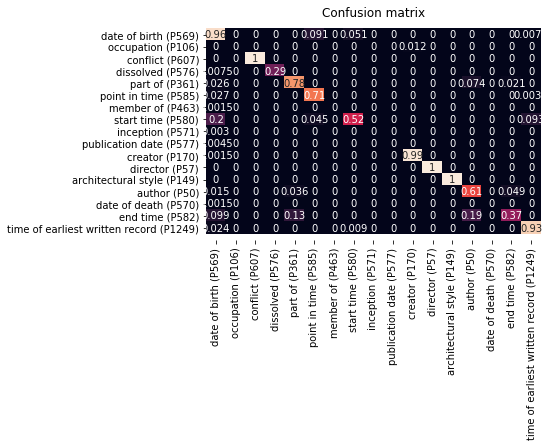

In [425]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

confusion_matrix = confusion_matrix(y_test, y_predict)
conf_mat_normalized = confusion_matrix / confusion_matrix.sum(axis=1)
ax = sns.heatmap(data=conf_mat_normalized, annot=True, cbar=False, xticklabels=cat_mapper, yticklabels=cat_mapper)
plt.title('Confusion matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# MultinomialNB without stopwords

In [439]:
count_vect = CountVectorizer(ngram_range = [3,3], analyzer = 'word',  min_df = 2)
X_train = count_vect.fit_transform(train.open_q)
y_train = train['rel_r'].values

X_test = count_vect.transform(test.open_q)
y_test = test['rel_r'].values


In [440]:
classifier = MultinomialNB(alpha=0.2) # best parameter: 0.2
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

In [441]:
y_predict = classifier.predict(X_test)

In [442]:
print('Accuracy score:', accuracy_score(y_test, y_predict))
print('F1-measure (micro):', f1_score(y_test, y_predict, average='micro'))
print('F1-measure (macro):', f1_score(y_test, y_predict, average='macro'))

Accuracy score: 0.8788888888888889
F1-measure (micro): 0.8788888888888889
F1-measure (macro): 0.6391611788485703


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [443]:
# cat_mapper = {cat: n for n, cat in enumerate(test.rel_r.unique())}

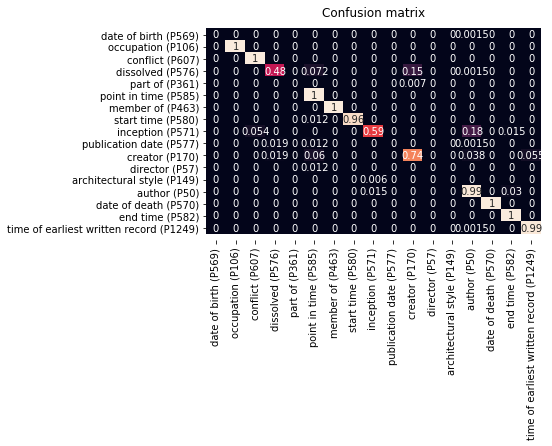

In [444]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

confusion_matrix = confusion_matrix(y_test, y_predict)
conf_mat_normalized = confusion_matrix / confusion_matrix.sum(axis=1)
ax = sns.heatmap(data=conf_mat_normalized, annot=True, cbar=False, xticklabels=cat_mapper, yticklabels=cat_mapper)
plt.title('Confusion matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# tf-idf

In [451]:
tfidf_vect = TfidfVectorizer()
X_train = tfidf_vect.fit_transform(train.open_q)
y_train = train['rel_r'].values

X_test = tfidf_vect.transform(test.open_q)
y_test = test['rel_r'].values

In [484]:
classifier = MultinomialNB(alpha=0.0001) #001
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.0001, class_prior=None, fit_prior=True)

In [485]:
y_predict = classifier.predict(X_test)

In [486]:
# try probabilities


# probs_pred = predict_log_proba(self, X)

In [487]:
print('Accuracy score:', accuracy_score(y_test, y_predict))
print('F1-measure (micro):', f1_score(y_test, y_predict, average='micro'))
print('F1-measure (macro):', f1_score(y_test, y_predict, average='macro'))

Accuracy score: 0.9766666666666667
F1-measure (micro): 0.9766666666666667
F1-measure (macro): 0.9735864259993923


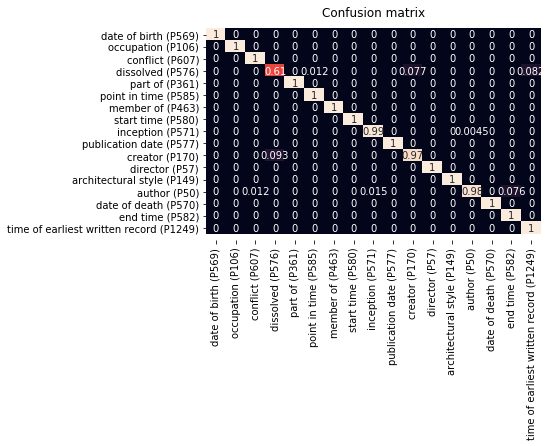

In [488]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

confusion_matrix = confusion_matrix(y_test, y_predict)
conf_mat_normalized = confusion_matrix / confusion_matrix.sum(axis=1)
ax = sns.heatmap(data=conf_mat_normalized, annot=True, cbar=False, xticklabels=cat_mapper, yticklabels=cat_mapper)
plt.title('Confusion matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [489]:
# y_predict = y_predict.tolist()
# with open("class_rels97.json", "w", encoding="utf-8") as f:
#         json.dump(y_predict, f, ensure_ascii=False, indent=4)

# Linear SVM

In [297]:
from sklearn.svm import LinearSVC

In [298]:
tfidf_vect = TfidfVectorizer(ngram_range = [3,3], analyzer = 'word',  min_df = 2)
X_train = tfidf_vect.fit_transform(train.open_q)
y_train = train['rel_r'].values

X_test = tfidf_vect.transform(test.open_q)
y_test = test['rel_r'].values

In [299]:
count_vect = CountVectorizer(ngram_range = [3,3], analyzer = 'word',  min_df = 2)
X_train = count_vect.fit_transform(train.open_q)
y_train = train['rel_r'].values

X_test = count_vect.transform(test.open_q)
y_test = test['rel_r'].values


In [300]:
classifier = LinearSVC() #class_weight="balanced"
classifier.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [301]:
y_predict = classifier.predict(X_test)

In [302]:
print('Accuracy score:', accuracy_score(y_test, y_predict))
print('F1-measure (micro):', f1_score(y_test, y_predict, average='micro'))
print('F1-measure (macro):', f1_score(y_test, y_predict, average='macro'))

Accuracy score: 0.9211111111111111
F1-measure (micro): 0.9211111111111111
F1-measure (macro): 0.7160387539961598


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


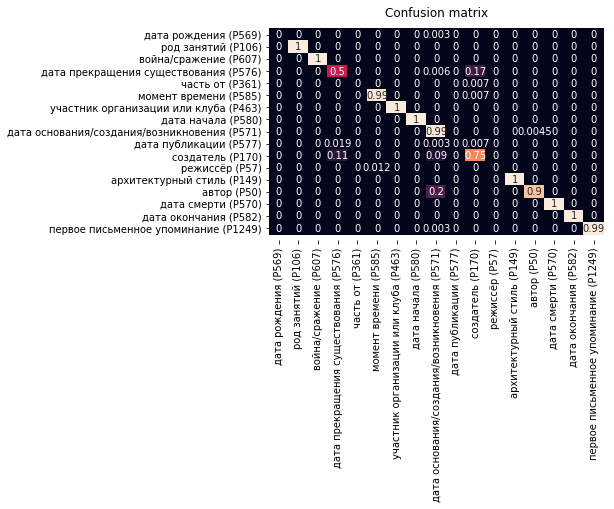

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

confusion_matrix = confusion_matrix(y_test, y_predict)
conf_mat_normalized = confusion_matrix / confusion_matrix.sum(axis=1)
ax = sns.heatmap(data=conf_mat_normalized, annot=True, cbar=False, xticklabels=cat_mapper, yticklabels=cat_mapper)
plt.title('Confusion matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [73]:
y_predict = y_predict.tolist()

In [74]:
test_['rel_pred'] = pd.Series(y_predict)

In [75]:
test_.head()

,Q,answer_dp,answer_open,atr,ent,open_q,rel,rel_r,type,type_pred,what,rel_pred
0,Q4409522,В 1978 году,1910,date,"Сахнин, Аркадий Яковлевич",В каком году родился Аркадий Яковлевич Сахнин?,P569,дата рождения (P569),start,start,человек,дата рождения (P569)
1,Q4265116,начальником конструкторского бюро цеха,инженер,Q81096,"Логинов, Фёдор Георгиевич",Кем по профессии был Фёдор Георгиевич Логинов?,P106,род занятий (P106),P106,P106,человек,род занятий (P106)
2,Q4102324,в Бородинском сражении,Русско-шведская война,Q736268,"Вадковский, Яков Егорович",В каком вооружённом конфликте участвовал Яков ...,P607,война/сражение (P607),P607,P607,человек,война/сражение (P607)
3,Q21391909,педагогом Ленинградского университета,психолог,Q212980,"Люблинская, Анна Александровна",Кем по профессии была Анна Александровна Любли...,P106,род занятий (P106),P106,P106,человек,род занятий (P106)
4,Q4240145,в советско-японской войне 1945 года,Курская битва,Q130861,"Кремер, Симон Давидович",В какой войне участвовал Симон Давидович Кремер?,P607,война/сражение (P607),P607,P607,человек,война/сражение (P607)
